In [184]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
data_original = pd.read_csv('./data/customer_segmentation.csv')
clusters = pd.read_csv('./data/df_cluster_data.csv')

In [186]:
shopping_article = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
shopping_method = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
campañas = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# me gusta tener esto a mano

In [187]:
data_original['Total_spending'] = data_original[shopping_article].sum(axis= 1)
data_original['Total_purchases'] = data_original[shopping_method].sum(axis= 1)

# esto va a venir bien

In [188]:
data_original

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_spending,Total_purchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,53,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,422,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,1341,16
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,444,15
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,1241,18
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,843,21


In [189]:
clusters

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
2235,0
2236,0
2237,0
2238,0


In [190]:
df_final = data_original.join(clusters)

vamos a estudiar como se comportan los distintos clusteres, que caracteristicas tienen etc


In [191]:
# quitamos el ruido

indices_to_drop = df_final[df_final['cluster'] == -1].index


In [192]:
df_final.drop(indices_to_drop, inplace= True)

In [193]:
df_final.cluster.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [194]:
# voy a crear diferentes dataframes segun los clusteres y voy a estudiarlos 1 por 1 a ver si podemos sacar pautas de consumo

df_cluster_0 = df_final[df_final['cluster'] == 0]
df_cluster_1 = df_final[df_final['cluster'] == 1]
df_cluster_2 = df_final[df_final['cluster'] == 2]
df_cluster_3 = df_final[df_final['cluster'] == 3]
df_cluster_4 = df_final[df_final['cluster'] == 4]
df_cluster_5 = df_final[df_final['cluster'] == 5]
df_cluster_6 = df_final[df_final['cluster'] == 6]
df_cluster_7 = df_final[df_final['cluster'] == 7]

creamos funciones para estudias los clusteres 1 por 1

In [195]:
# funcion para ver el estado marital de la tipologia de consumidor
def obtener_marital(data):
    print(f'ESTADO MARITAL DE CLUSTER {data.cluster.mean()}')
    print()
    print(data.Marital_Status.value_counts(normalize= True))
    print('------------------------------------------------------')


In [196]:
# funcion para ver el nivel educativo de la tipologia de consumidor
def obtener_educacion(data):
    print(f'EDUCACION DE CLUSTER {data.cluster.mean()}')
    print()
    print(data.Education.value_counts(normalize= True))
    print('------------------------------------------------------')

In [197]:
# funcion para estudiar la renta de la tipologia de consumidor
def obtener_renta(data):
    print(f'RENTA DE CLUSTER {data.cluster.mean()}')
    print()
    print(data.Income.describe())
    print('------------------------------------------------------')

In [198]:
# funcion para dibujar los consumos de la tipologia de consumidor
def pintar_consumos(data):

    print(f'DISTRIBUCION DE GASTO DE CLUSTER {data.cluster.mean()}')
    print()
    variables_numericas = {
        'MntWines': data['MntWines'].sum()/data['Total_spending'].sum(),
        'MntFruits': data['MntFruits'].sum()/data['Total_spending'].sum(),
        'MntMeatProducts': data['MntMeatProducts'].sum()/data['Total_spending'].sum(),
        'MntFishProducts': data['MntFishProducts'].sum()/data['Total_spending'].sum(),
        'MntSweetProducts': data['MntSweetProducts'].sum()/data['Total_spending'].sum(),
        'MntGoldProds': data['MntGoldProds'].sum()/data['Total_spending'].sum()
    }

    plt.figure(figsize= (15, 8))
    plt.bar(variables_numericas.keys(), variables_numericas.values(), color= ['blue', 'red', 'green', 'yellow', 'orange', 'brown'])

    # Configuración de ejes y etiquetas
    plt.title(f'distribucion de consumo en cluster {data.cluster.unique()}')

    #plt.savefig('elo_tipos_por_paises.png')
    plt.show()
    print('------------------------------------------------------')

In [199]:
# funcion para ver la cantidad de chiquillos en los hogares de la tipologia de consumidor
def obtener_chiquillos(data):
    print(f'CHIQUILLOS DE CLUSTER {data.cluster.mean()}')
    print()
    print(data[['Kidhome', 'Teenhome']].describe())
    print('------------------------------------------------------')

In [200]:
# funcion para ver la distribucion en el metodo de compra de la tipologia de consumidor
def pintar_compras(data):

    print(f'METODOS DE COMPRA DE CLUSTER {data.cluster.mean()}')
    print()
    variables_numericas = {
        'NumWebPurchases': data['NumWebPurchases'].sum()/data['Total_purchases'].sum(),
        'NumCatalogPurchases': data['NumCatalogPurchases'].sum()/data['Total_purchases'].sum(),
        'NumStorePurchases': data['NumStorePurchases'].sum()/data['Total_purchases'].sum(),
    }

    plt.figure(figsize= (15, 8))
    plt.bar(variables_numericas.keys(), variables_numericas.values(), color= ['blue', 'red', 'green'])

    # Configuración de ejes y etiquetas
    plt.title(f'distribucion de consumo en cluster {data.cluster.unique()}')
    plt.show()
    print('------------------------------------------------------')

In [201]:
# funcion para ver las compras en oferta de la tipologia de consumidor
def obtener_compras_ofertas(data):
    print(f'COMPRAS EN OFERTAS DE CLUSTER {data.cluster.mean()}')
    print()
    print(data.NumDealsPurchases.describe())
    print('------------------------------------------------------')


In [202]:
# funcion para ver las repuestas a las antiguas y presente campaña de promocion de la tipologia de consumidor
def obtener_respuesta_campaña(data):
    print(f'RESPUESTAS A CAMPAÑAS DE CLUSTER {data.cluster.mean()}')
    print()
    print(data[campañas].describe())
    print('------------------------------------------------------')


In [203]:
lista_funciones = [
    obtener_marital,
    obtener_educacion,
    obtener_renta,
    pintar_consumos,
    obtener_chiquillos,
    pintar_compras,
    obtener_compras_ofertas,
    obtener_respuesta_campaña
]

vamos a comenzar a estudiar los clusteres uno por uno

cluster 0

ESTADO MARITAL DE CLUSTER 0.0

Marital_Status
Married     0.388460
Together    0.258519
Single      0.214902
Divorced    0.100863
Widow       0.034530
Alone       0.001363
YOLO        0.000909
Absurd      0.000454
Name: proportion, dtype: float64
------------------------------------------------------
EDUCACION DE CLUSTER 0.0

Education
Graduation    0.502499
PhD           0.217174
Master        0.164471
2n Cycle      0.091322
Basic         0.024534
Name: proportion, dtype: float64
------------------------------------------------------
RENTA DE CLUSTER 0.0

count      2177.000000
mean      51942.229674
std       24971.087293
min        2447.000000
25%       35178.000000
50%       51039.000000
75%       67911.000000
max      666666.000000
Name: Income, dtype: float64
------------------------------------------------------
DISTRIBUCION DE GASTO DE CLUSTER 0.0



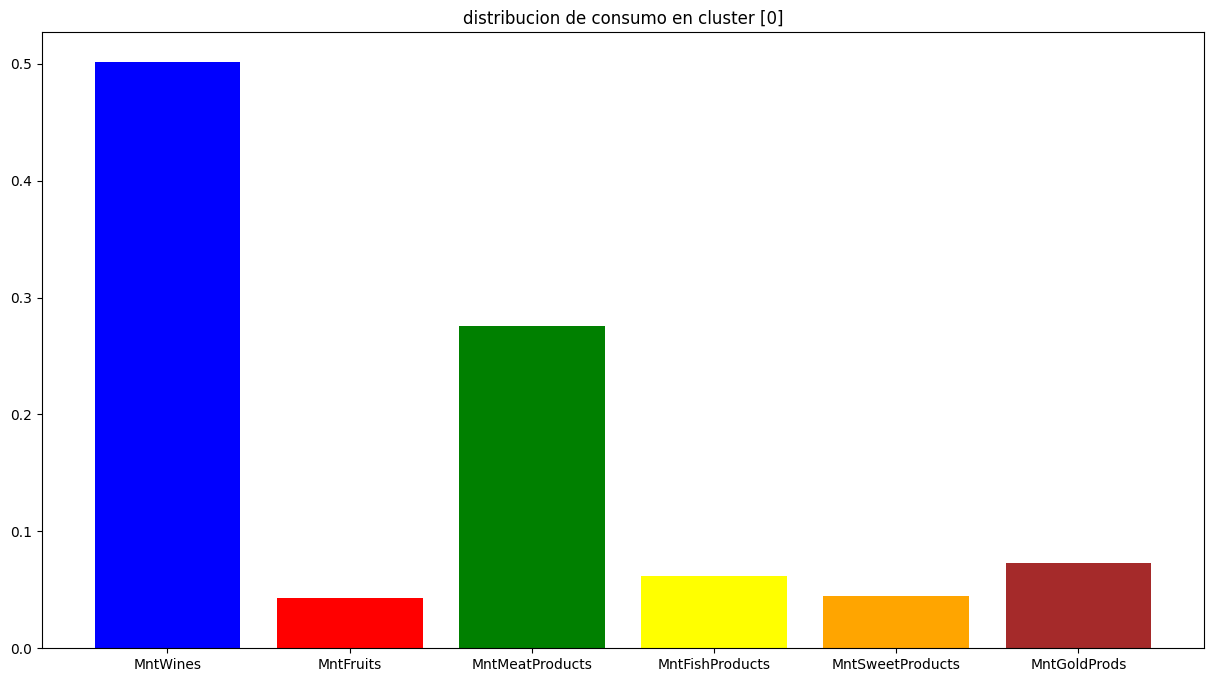

------------------------------------------------------
CHIQUILLOS DE CLUSTER 0.0

           Kidhome     Teenhome
count  2201.000000  2201.000000
mean      0.449796     0.507497
std       0.539656     0.542773
min       0.000000     0.000000
25%       0.000000     0.000000
50%       0.000000     0.000000
75%       1.000000     1.000000
max       2.000000     2.000000
------------------------------------------------------
METODOS DE COMPRA DE CLUSTER 0.0



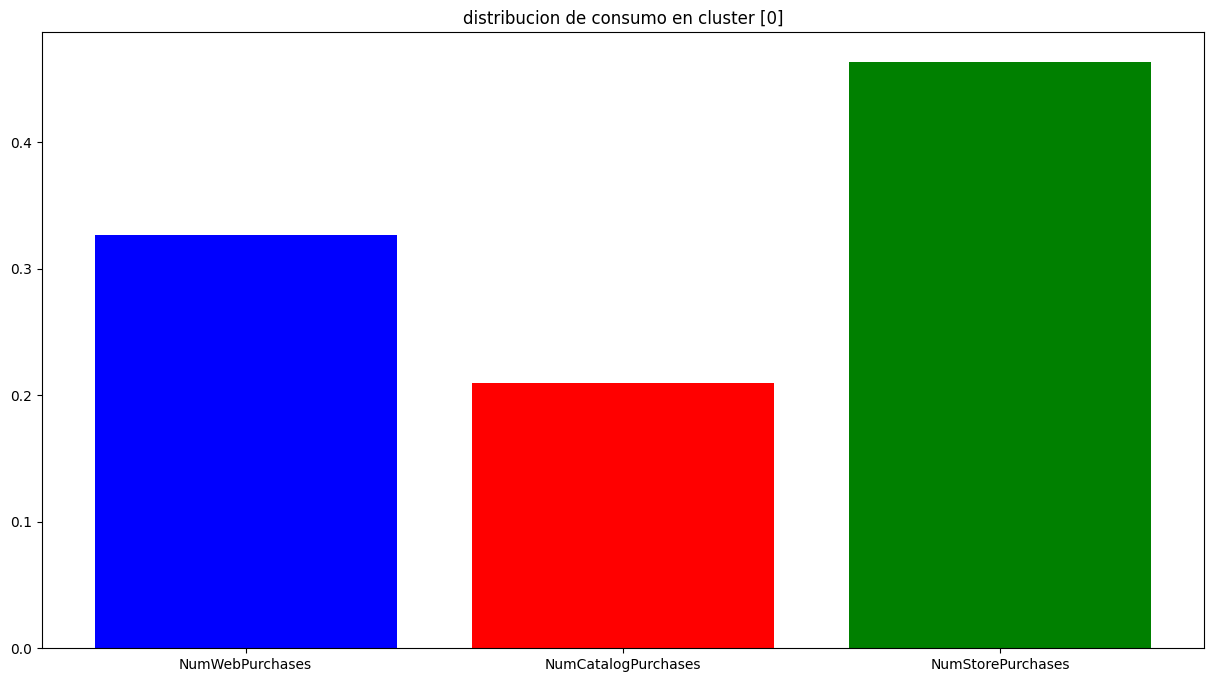

------------------------------------------------------
COMPRAS EN OFERTAS DE CLUSTER 0.0

count    2201.000000
mean        2.311222
std         1.861062
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64
------------------------------------------------------
RESPUESTAS A CAMPAÑAS DE CLUSTER 0.0

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count   2201.000000   2201.000000   2201.000000   2201.000000   2201.000000   
mean       0.054975      0.012721      0.069514      0.071786      0.064062   
std        0.227983      0.112095      0.254384      0.258191      0.244919   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.0

In [204]:
for func in lista_funciones:
    func(df_cluster_0)

cluster 1

ESTADO MARITAL DE CLUSTER 1.0

Marital_Status
Married    0.5
Single     0.5
Name: proportion, dtype: float64
------------------------------------------------------
EDUCACION DE CLUSTER 1.0

Education
Graduation    1.0
Name: proportion, dtype: float64
------------------------------------------------------
RENTA DE CLUSTER 1.0

count        2.000000
mean     87146.500000
std       5117.331775
min      83528.000000
25%      85337.250000
50%      87146.500000
75%      88955.750000
max      90765.000000
Name: Income, dtype: float64
------------------------------------------------------
DISTRIBUCION DE GASTO DE CLUSTER 1.0



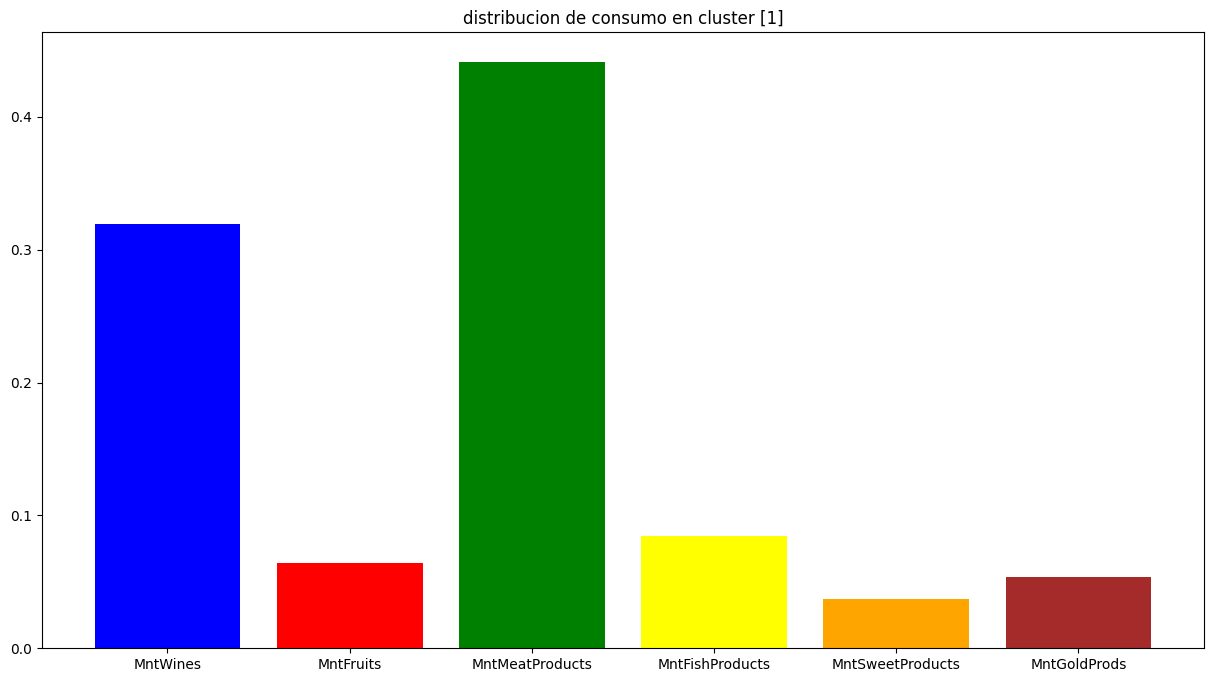

------------------------------------------------------
CHIQUILLOS DE CLUSTER 1.0

       Kidhome  Teenhome
count      2.0       2.0
mean       0.0       0.0
std        0.0       0.0
min        0.0       0.0
25%        0.0       0.0
50%        0.0       0.0
75%        0.0       0.0
max        0.0       0.0
------------------------------------------------------
METODOS DE COMPRA DE CLUSTER 1.0



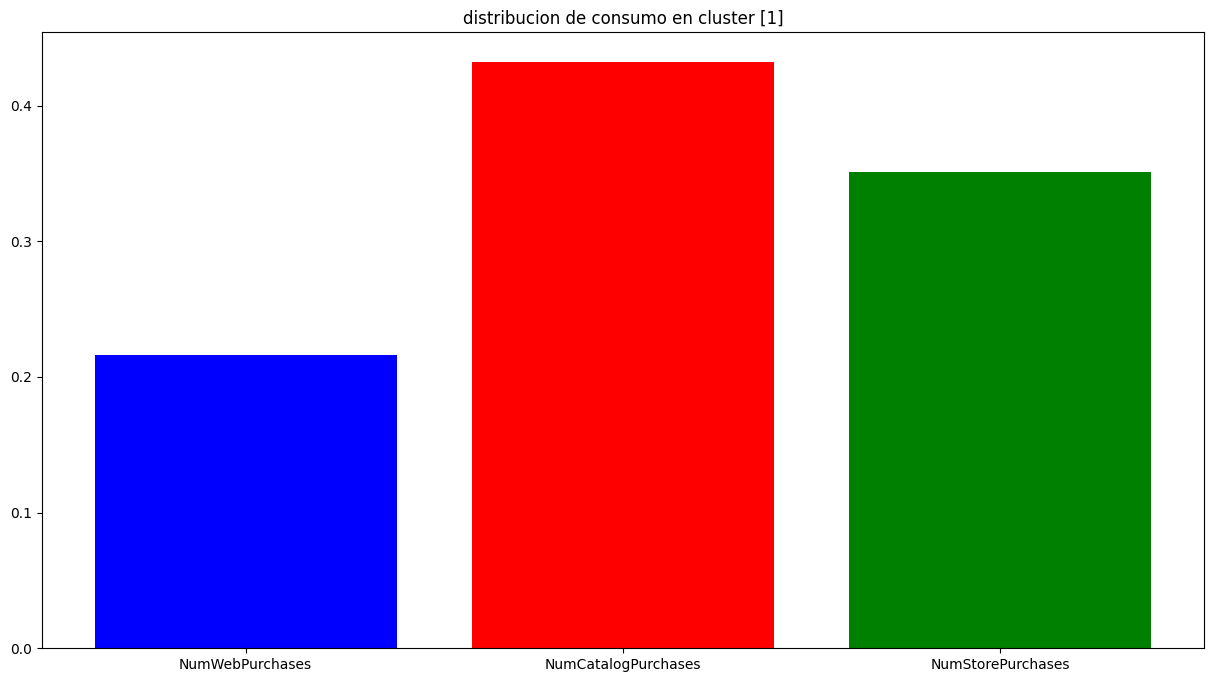

------------------------------------------------------
COMPRAS EN OFERTAS DE CLUSTER 1.0

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: NumDealsPurchases, dtype: float64
------------------------------------------------------
RESPUESTAS A CAMPAÑAS DE CLUSTER 1.0

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count           2.0           2.0      2.000000           2.0      2.000000   
mean            1.0           0.0      0.500000           0.0      0.500000   
std             0.0           0.0      0.707107           0.0      0.707107   
min             1.0           0.0      0.000000           0.0      0.000000   
25%             1.0           0.0      0.250000           0.0      0.250000   
50%             1.0           0.0      0.500000           0.0      0.500000   
75%             1.0           0.0      0.750000           0.0      0.750000   
m

In [205]:
for func in lista_funciones:
    func(df_cluster_1)

cluster 2

ESTADO MARITAL DE CLUSTER 2.0

Marital_Status
Divorced    0.75
Widow       0.25
Name: proportion, dtype: float64
------------------------------------------------------
EDUCACION DE CLUSTER 2.0

Education
Master        0.50
Graduation    0.25
PhD           0.25
Name: proportion, dtype: float64
------------------------------------------------------
RENTA DE CLUSTER 2.0

count        4.000000
mean     67574.000000
std       4704.854443
min      64140.000000
25%      64407.750000
50%      65933.000000
75%      69099.250000
max      74290.000000
Name: Income, dtype: float64
------------------------------------------------------
DISTRIBUCION DE GASTO DE CLUSTER 2.0



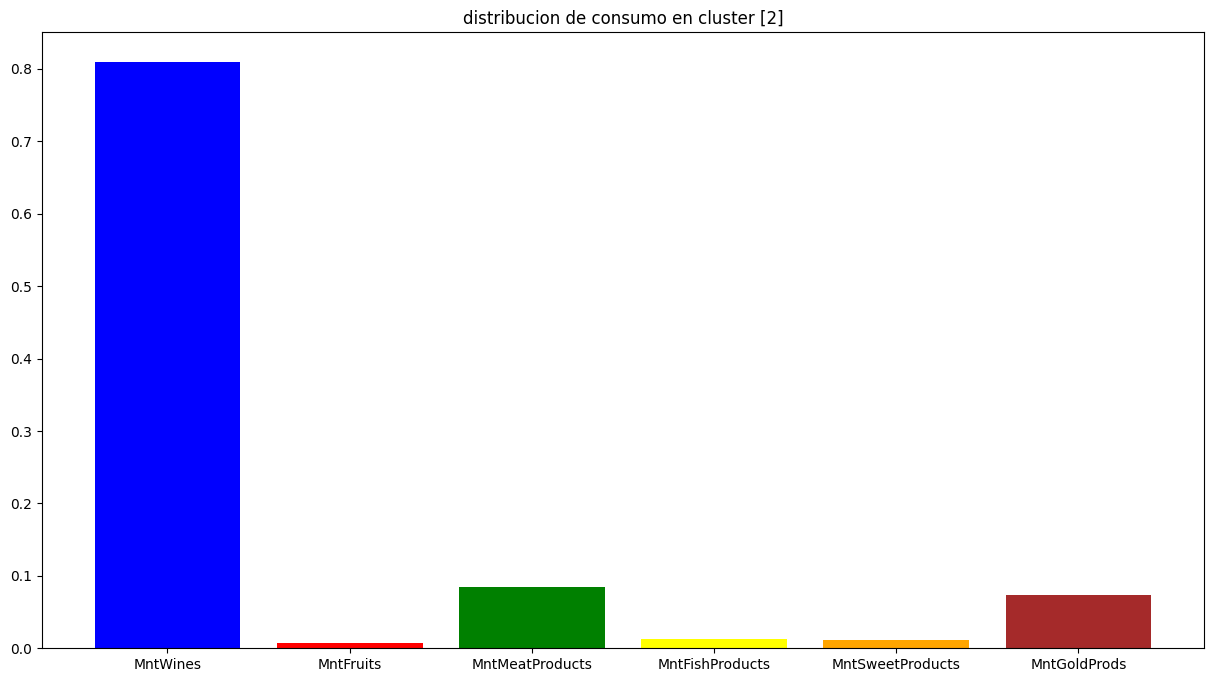

------------------------------------------------------
CHIQUILLOS DE CLUSTER 2.0

       Kidhome  Teenhome
count      4.0      4.00
mean       0.0      1.25
std        0.0      0.50
min        0.0      1.00
25%        0.0      1.00
50%        0.0      1.00
75%        0.0      1.25
max        0.0      2.00
------------------------------------------------------
METODOS DE COMPRA DE CLUSTER 2.0



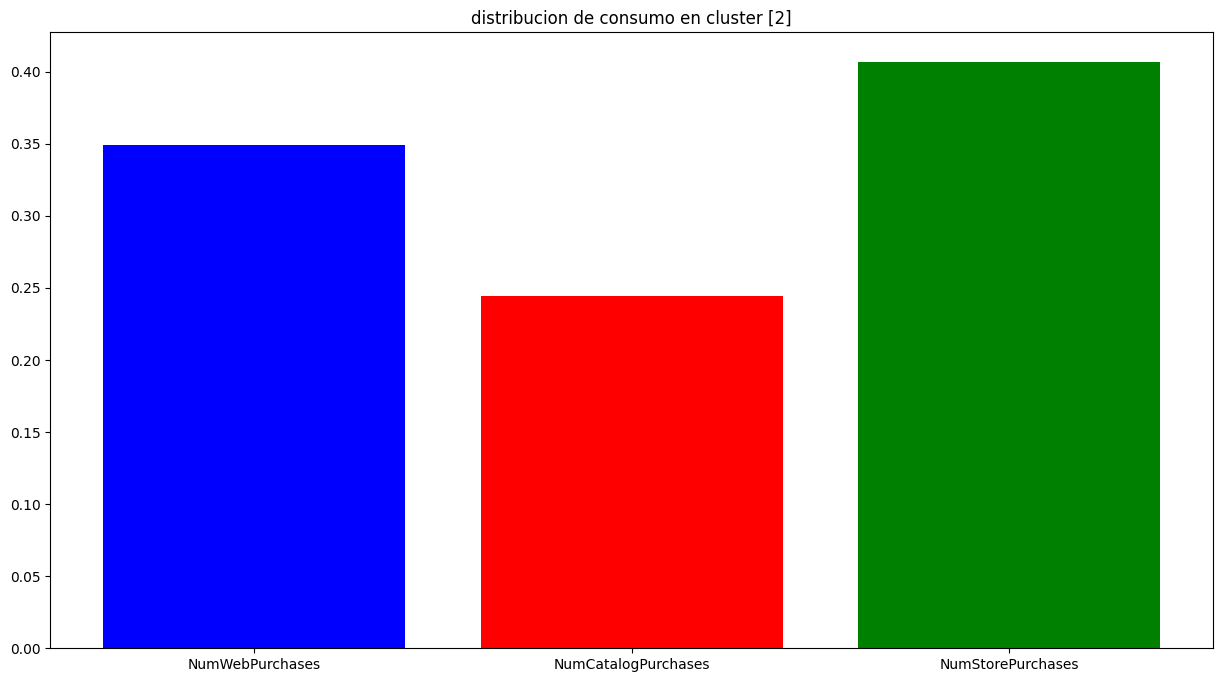

------------------------------------------------------
COMPRAS EN OFERTAS DE CLUSTER 2.0

count    4.00000
mean     4.50000
std      0.57735
min      4.00000
25%      4.00000
50%      4.50000
75%      5.00000
max      5.00000
Name: NumDealsPurchases, dtype: float64
------------------------------------------------------
RESPUESTAS A CAMPAÑAS DE CLUSTER 2.0

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count          4.00          4.00       4.00000       4.00000       4.00000   
mean           0.25          0.25       0.50000       0.50000       0.50000   
std            0.50          0.50       0.57735       0.57735       0.57735   
min            0.00          0.00       0.00000       0.00000       0.00000   
25%            0.00          0.00       0.00000       0.00000       0.00000   
50%            0.00          0.00       0.50000       0.50000       0.50000   
75%            0.25          0.25       1.00000       1.00000       1.00000   
max      

In [206]:
for func in lista_funciones:
    func(df_cluster_2)

cluster 3

ESTADO MARITAL DE CLUSTER 3.0

Marital_Status
Divorced    0.333333
Together    0.333333
Married     0.333333
Name: proportion, dtype: float64
------------------------------------------------------
EDUCACION DE CLUSTER 3.0

Education
Graduation    0.666667
Master        0.333333
Name: proportion, dtype: float64
------------------------------------------------------
RENTA DE CLUSTER 3.0

count         3.00000
mean      99463.00000
std        8119.25717
min       90226.00000
25%       96459.00000
50%      102692.00000
75%      104081.50000
max      105471.00000
Name: Income, dtype: float64
------------------------------------------------------
DISTRIBUCION DE GASTO DE CLUSTER 3.0



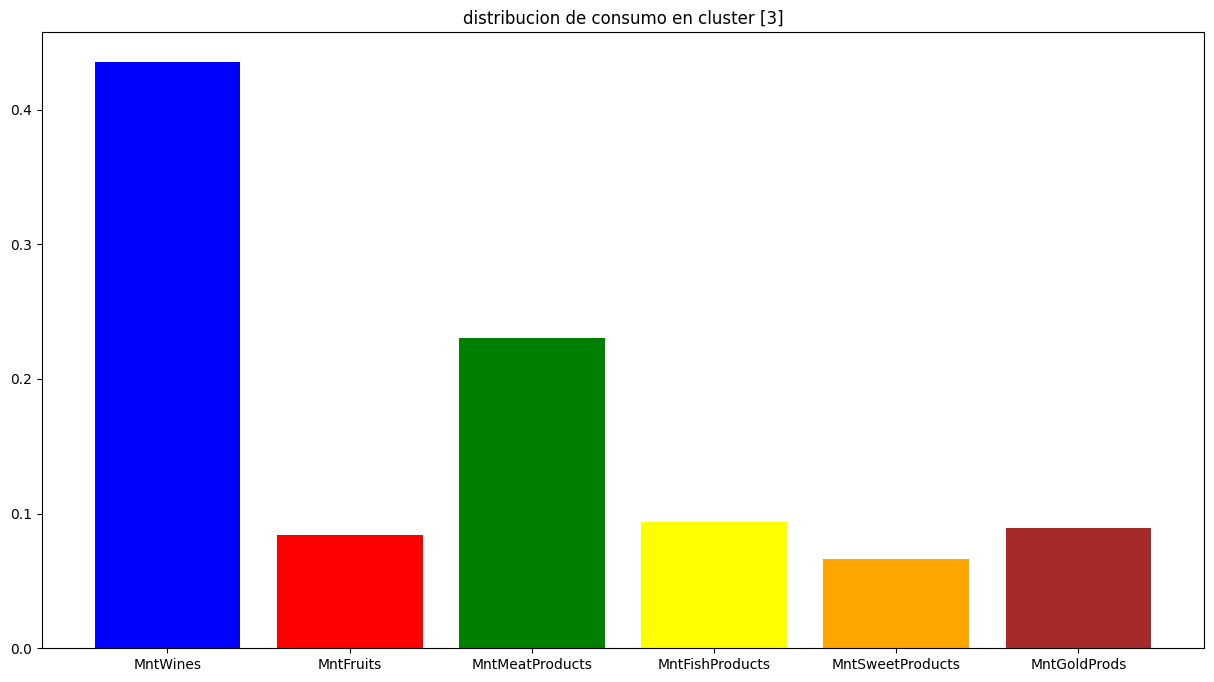

------------------------------------------------------
CHIQUILLOS DE CLUSTER 3.0

       Kidhome  Teenhome
count      3.0       3.0
mean       0.0       0.0
std        0.0       0.0
min        0.0       0.0
25%        0.0       0.0
50%        0.0       0.0
75%        0.0       0.0
max        0.0       0.0
------------------------------------------------------
METODOS DE COMPRA DE CLUSTER 3.0



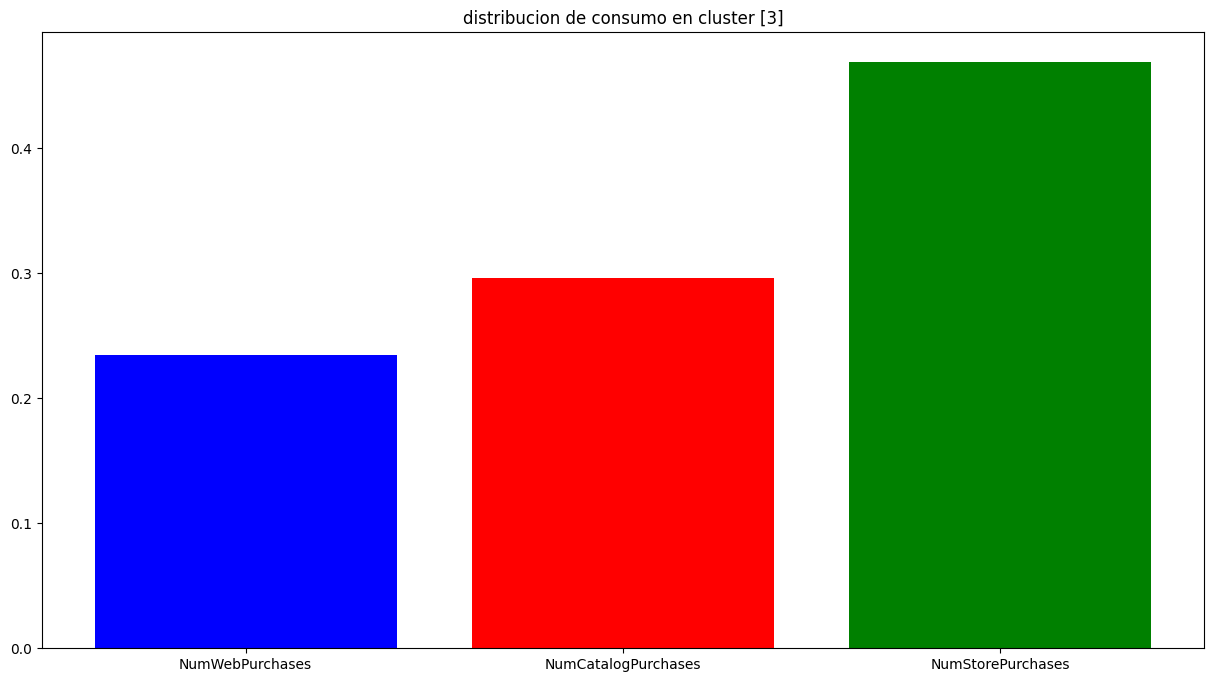

------------------------------------------------------
COMPRAS EN OFERTAS DE CLUSTER 3.0

count    3.000000
mean     0.666667
std      0.577350
min      0.000000
25%      0.500000
50%      1.000000
75%      1.000000
max      1.000000
Name: NumDealsPurchases, dtype: float64
------------------------------------------------------
RESPUESTAS A CAMPAÑAS DE CLUSTER 3.0

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count           3.0      3.000000           3.0      3.000000      3.000000   
mean            1.0      0.333333           0.0      0.333333      0.666667   
std             0.0      0.577350           0.0      0.577350      0.577350   
min             1.0      0.000000           0.0      0.000000      0.000000   
25%             1.0      0.000000           0.0      0.000000      0.500000   
50%             1.0      0.000000           0.0      0.000000      1.000000   
75%             1.0      0.500000           0.0      0.500000      1.000000   
m

In [207]:
for func in lista_funciones:
    func(df_cluster_3)

cluster 4

ESTADO MARITAL DE CLUSTER 4.0

Marital_Status
Married     0.333333
Together    0.333333
Divorced    0.333333
Name: proportion, dtype: float64
------------------------------------------------------
EDUCACION DE CLUSTER 4.0

Education
PhD           0.333333
Graduation    0.333333
2n Cycle      0.333333
Name: proportion, dtype: float64
------------------------------------------------------
RENTA DE CLUSTER 4.0

count        3.000000
mean     67204.000000
std       3457.252811
min      64176.000000
25%      65320.500000
50%      66465.000000
75%      68718.000000
max      70971.000000
Name: Income, dtype: float64
------------------------------------------------------
DISTRIBUCION DE GASTO DE CLUSTER 4.0



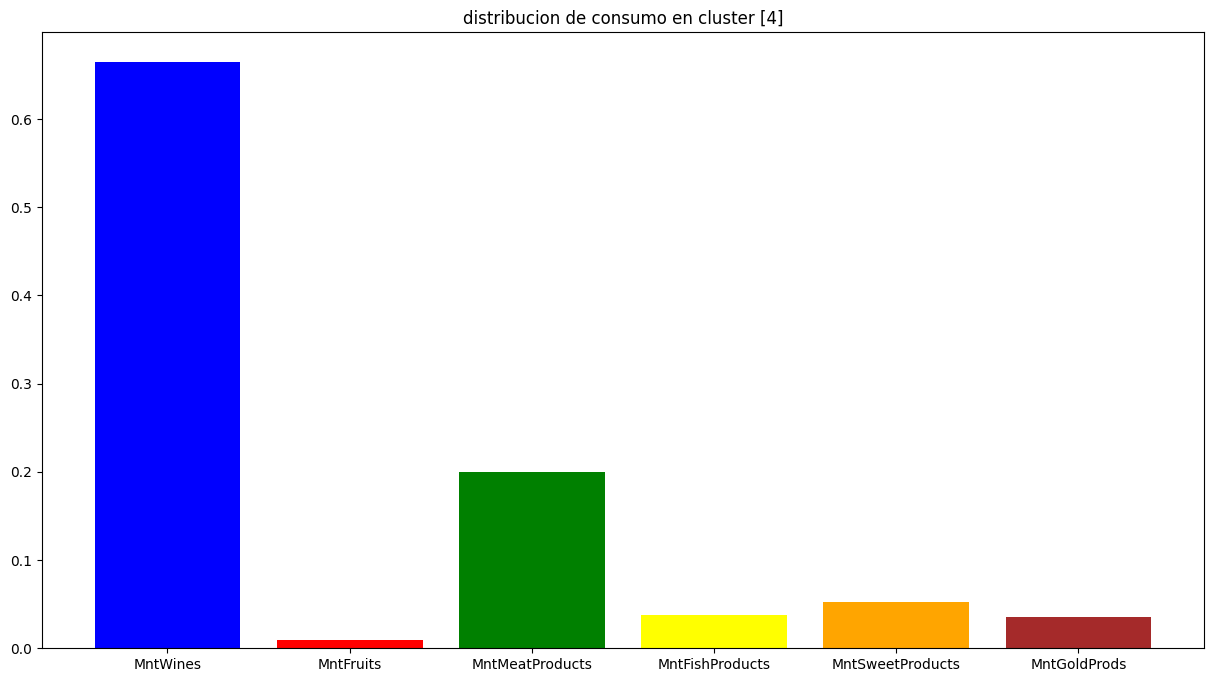

------------------------------------------------------
CHIQUILLOS DE CLUSTER 4.0

       Kidhome  Teenhome
count      3.0       3.0
mean       0.0       1.0
std        0.0       0.0
min        0.0       1.0
25%        0.0       1.0
50%        0.0       1.0
75%        0.0       1.0
max        0.0       1.0
------------------------------------------------------
METODOS DE COMPRA DE CLUSTER 4.0



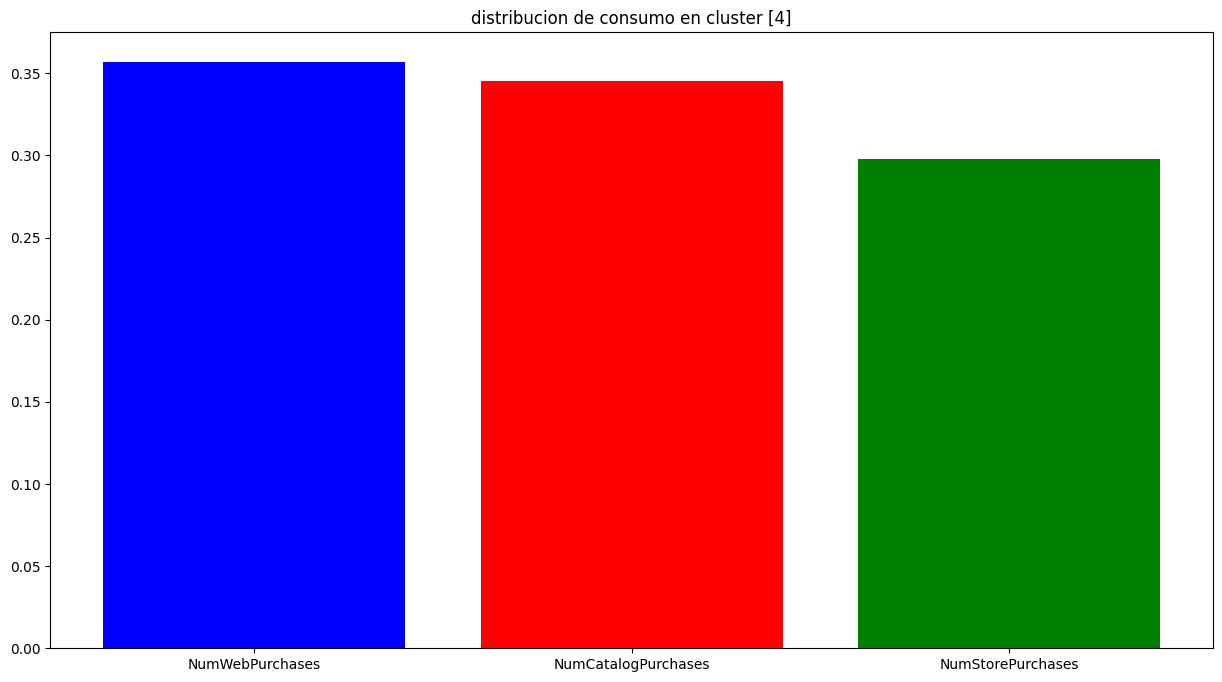

------------------------------------------------------
COMPRAS EN OFERTAS DE CLUSTER 4.0

count    3.000000
mean     6.000000
std      2.645751
min      3.000000
25%      5.000000
50%      7.000000
75%      7.500000
max      8.000000
Name: NumDealsPurchases, dtype: float64
------------------------------------------------------
RESPUESTAS A CAMPAÑAS DE CLUSTER 4.0

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count      3.000000           3.0           3.0           3.0           3.0   
mean       0.333333           0.0           0.0           0.0           0.0   
std        0.577350           0.0           0.0           0.0           0.0   
min        0.000000           0.0           0.0           0.0           0.0   
25%        0.000000           0.0           0.0           0.0           0.0   
50%        0.000000           0.0           0.0           0.0           0.0   
75%        0.500000           0.0           0.0           0.0           0.0   
m

In [208]:
for func in lista_funciones:
    func(df_cluster_4)

cluster 5

ESTADO MARITAL DE CLUSTER 5.0

Marital_Status
Married     0.5
Together    0.5
Name: proportion, dtype: float64
------------------------------------------------------
EDUCACION DE CLUSTER 5.0

Education
Graduation    0.666667
Master        0.166667
2n Cycle      0.166667
Name: proportion, dtype: float64
------------------------------------------------------
RENTA DE CLUSTER 5.0

count        6.000000
mean     87728.833333
std       7016.628404
min      76653.000000
25%      83664.250000
50%      89921.000000
75%      92723.250000
max      94642.000000
Name: Income, dtype: float64
------------------------------------------------------
DISTRIBUCION DE GASTO DE CLUSTER 5.0



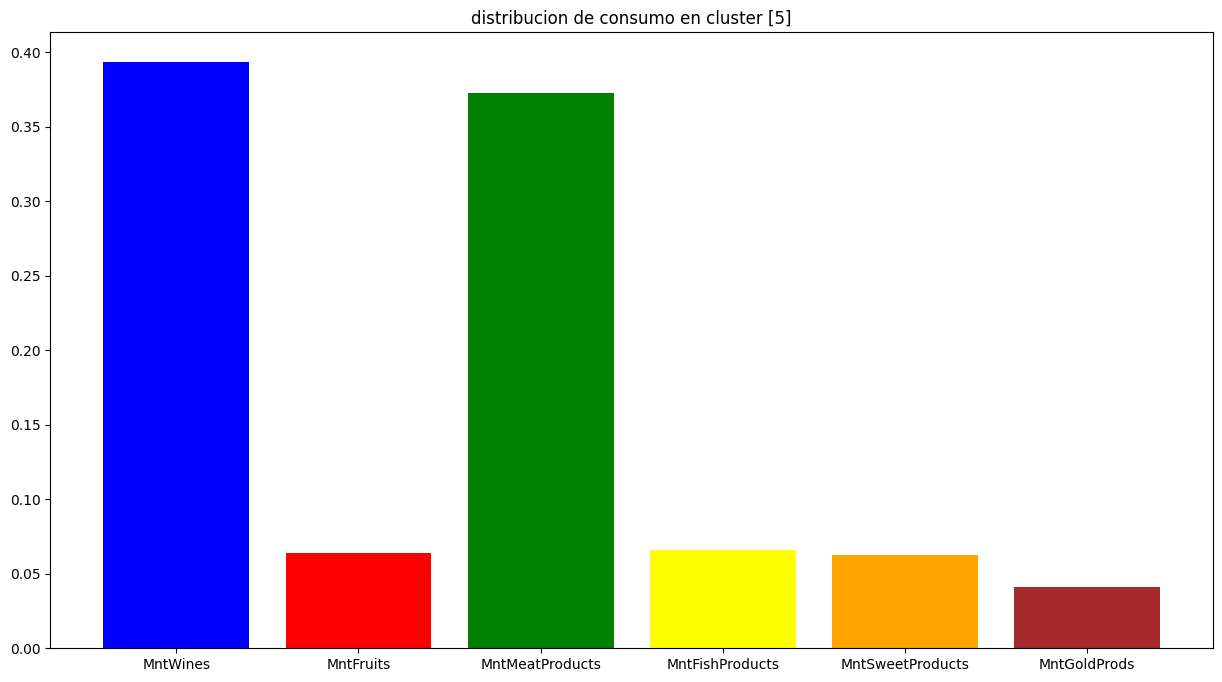

------------------------------------------------------
CHIQUILLOS DE CLUSTER 5.0

       Kidhome  Teenhome
count      6.0       6.0
mean       0.0       0.0
std        0.0       0.0
min        0.0       0.0
25%        0.0       0.0
50%        0.0       0.0
75%        0.0       0.0
max        0.0       0.0
------------------------------------------------------
METODOS DE COMPRA DE CLUSTER 5.0



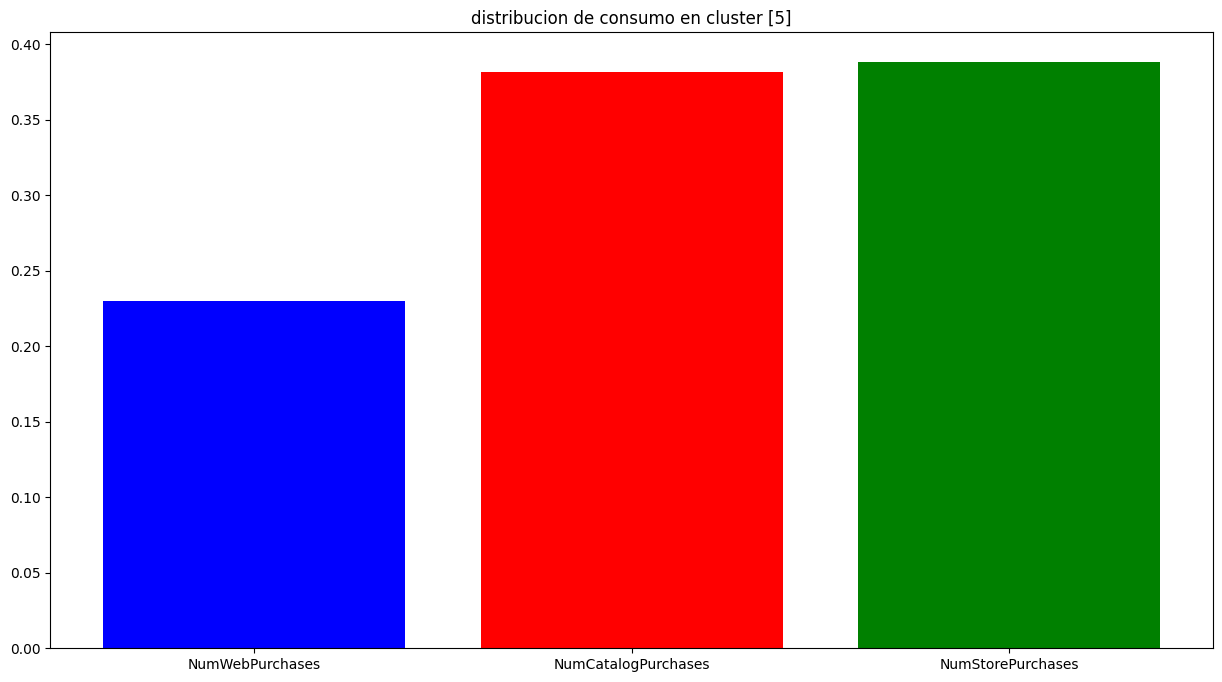

------------------------------------------------------
COMPRAS EN OFERTAS DE CLUSTER 5.0

count    6.000000
mean     0.666667
std      0.516398
min      0.000000
25%      0.250000
50%      1.000000
75%      1.000000
max      1.000000
Name: NumDealsPurchases, dtype: float64
------------------------------------------------------
RESPUESTAS A CAMPAÑAS DE CLUSTER 5.0

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count           6.0           6.0      6.000000      6.000000           6.0   
mean            1.0           0.0      0.166667      0.333333           1.0   
std             0.0           0.0      0.408248      0.516398           0.0   
min             1.0           0.0      0.000000      0.000000           1.0   
25%             1.0           0.0      0.000000      0.000000           1.0   
50%             1.0           0.0      0.000000      0.000000           1.0   
75%             1.0           0.0      0.000000      0.750000           1.0   
m

In [209]:
for func in lista_funciones:
    func(df_cluster_5)

cluster 6

ESTADO MARITAL DE CLUSTER 6.0

Marital_Status
Single      0.428571
Divorced    0.285714
Together    0.142857
Married     0.142857
Name: proportion, dtype: float64
------------------------------------------------------
EDUCACION DE CLUSTER 6.0

Education
Graduation    0.571429
Master        0.428571
Name: proportion, dtype: float64
------------------------------------------------------
RENTA DE CLUSTER 6.0

count        7.000000
mean     88232.428571
std       3100.466033
min      83829.000000
25%      86124.500000
50%      90000.000000
75%      90455.500000
max      90638.000000
Name: Income, dtype: float64
------------------------------------------------------
DISTRIBUCION DE GASTO DE CLUSTER 6.0



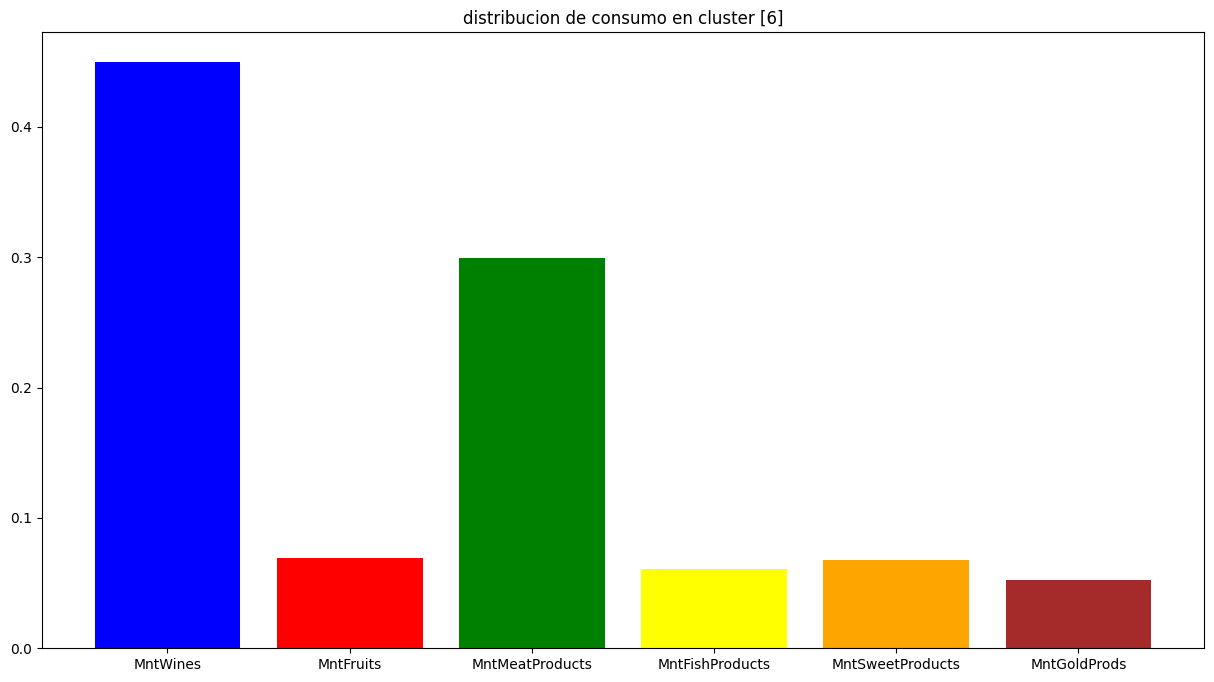

------------------------------------------------------
CHIQUILLOS DE CLUSTER 6.0

       Kidhome  Teenhome
count      7.0       7.0
mean       0.0       0.0
std        0.0       0.0
min        0.0       0.0
25%        0.0       0.0
50%        0.0       0.0
75%        0.0       0.0
max        0.0       0.0
------------------------------------------------------
METODOS DE COMPRA DE CLUSTER 6.0



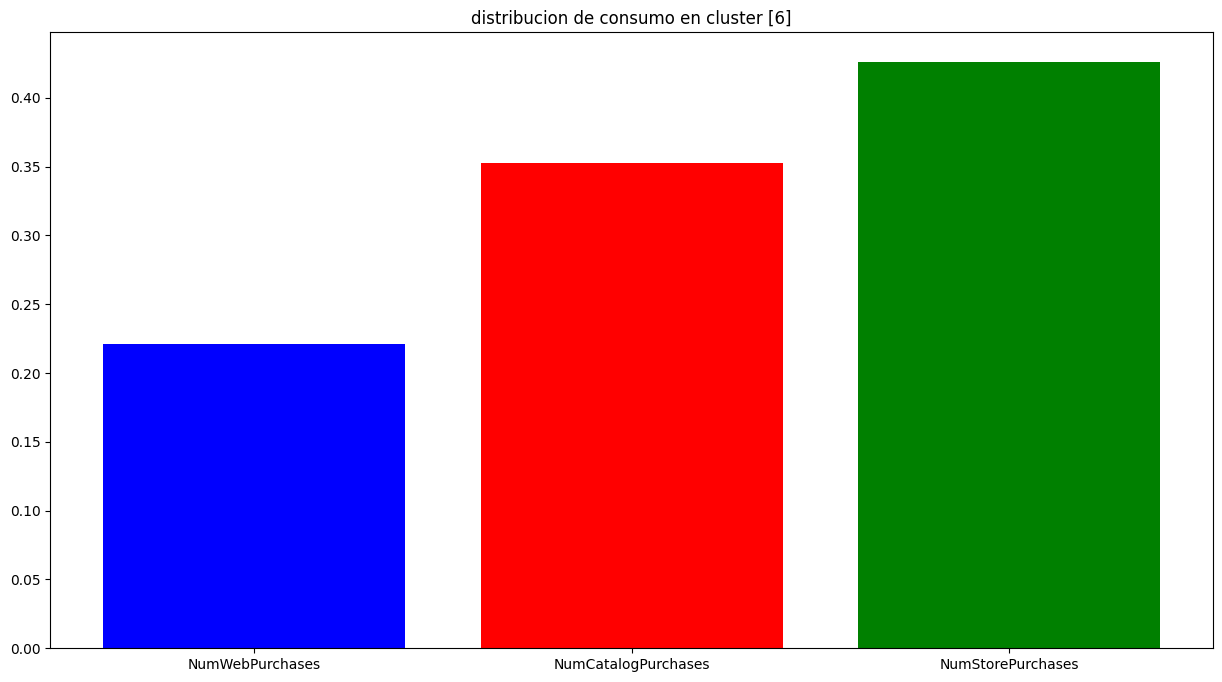

------------------------------------------------------
COMPRAS EN OFERTAS DE CLUSTER 6.0

count    7.000000
mean     0.714286
std      0.487950
min      0.000000
25%      0.500000
50%      1.000000
75%      1.000000
max      1.000000
Name: NumDealsPurchases, dtype: float64
------------------------------------------------------
RESPUESTAS A CAMPAÑAS DE CLUSTER 6.0

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count      7.000000           7.0      7.000000      7.000000           7.0   
mean       0.714286           0.0      0.571429      0.142857           1.0   
std        0.487950           0.0      0.534522      0.377964           0.0   
min        0.000000           0.0      0.000000      0.000000           1.0   
25%        0.500000           0.0      0.000000      0.000000           1.0   
50%        1.000000           0.0      1.000000      0.000000           1.0   
75%        1.000000           0.0      1.000000      0.000000           1.0   
m

In [210]:
for func in lista_funciones:
    func(df_cluster_6)

cluster 7

ESTADO MARITAL DE CLUSTER 7.0

Marital_Status
Married    0.5
Single     0.5
Name: proportion, dtype: float64
------------------------------------------------------
EDUCACION DE CLUSTER 7.0

Education
Master        0.5
Graduation    0.5
Name: proportion, dtype: float64
------------------------------------------------------
RENTA DE CLUSTER 7.0

count        2.000000
mean     88470.500000
std       7522.909045
min      83151.000000
25%      85810.750000
50%      88470.500000
75%      91130.250000
max      93790.000000
Name: Income, dtype: float64
------------------------------------------------------
DISTRIBUCION DE GASTO DE CLUSTER 7.0



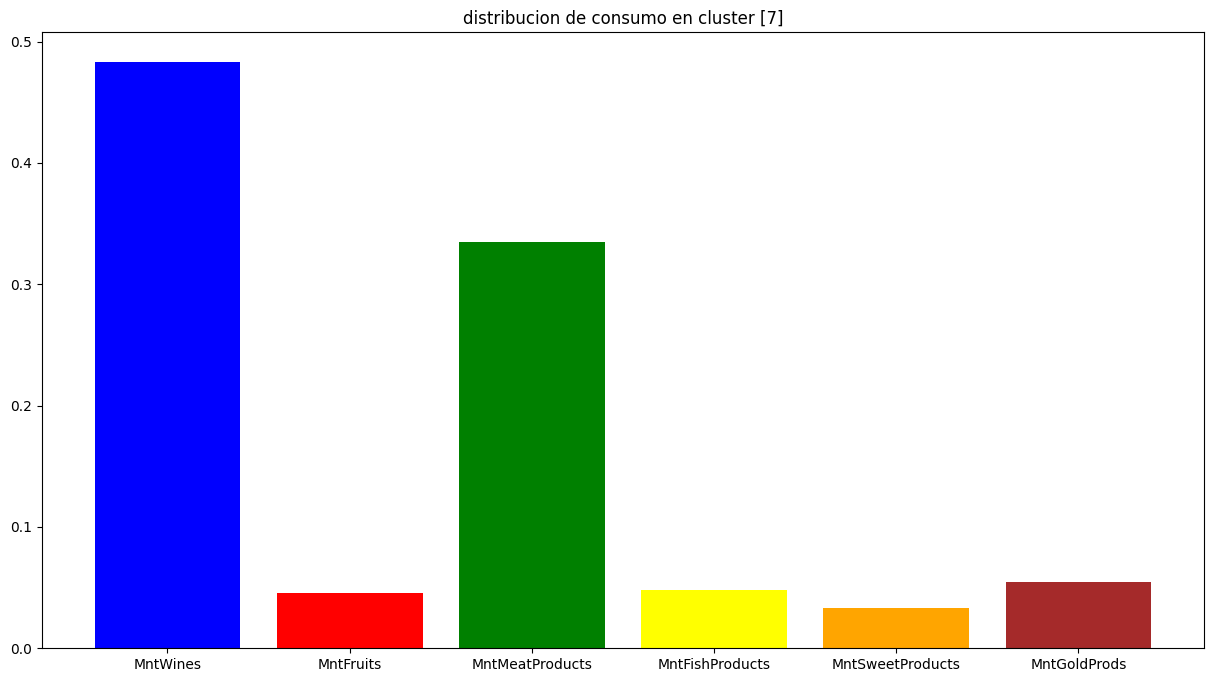

------------------------------------------------------
CHIQUILLOS DE CLUSTER 7.0

       Kidhome  Teenhome
count      2.0       2.0
mean       0.0       0.0
std        0.0       0.0
min        0.0       0.0
25%        0.0       0.0
50%        0.0       0.0
75%        0.0       0.0
max        0.0       0.0
------------------------------------------------------
METODOS DE COMPRA DE CLUSTER 7.0



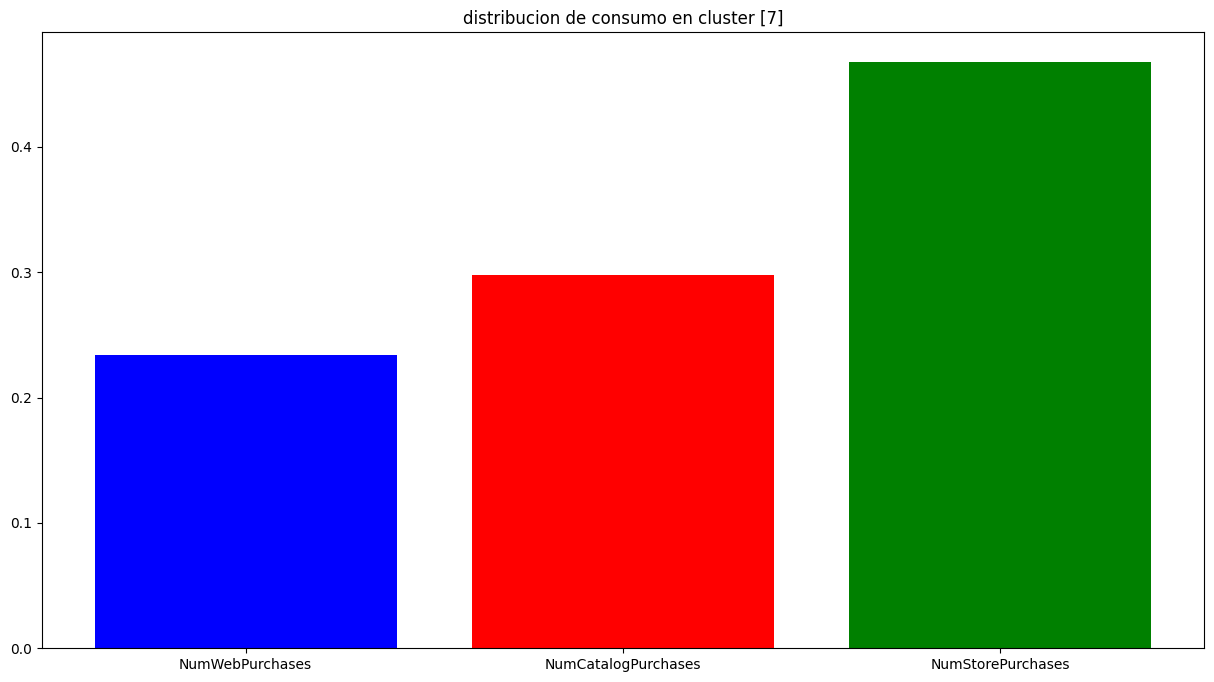

------------------------------------------------------
COMPRAS EN OFERTAS DE CLUSTER 7.0

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: NumDealsPurchases, dtype: float64
------------------------------------------------------
RESPUESTAS A CAMPAÑAS DE CLUSTER 7.0

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count           2.0           2.0      2.000000      2.000000           2.0   
mean            1.0           0.0      0.500000      0.500000           1.0   
std             0.0           0.0      0.707107      0.707107           0.0   
min             1.0           0.0      0.000000      0.000000           1.0   
25%             1.0           0.0      0.250000      0.250000           1.0   
50%             1.0           0.0      0.500000      0.500000           1.0   
75%             1.0           0.0      0.750000      0.750000           1.0   
m

In [211]:
for func in lista_funciones:
    func(df_cluster_7)